# Use mrp7pred locally to predict MRP7 modulators

1. Run predictions using pre-trained model
2. Train new models

***In this demo, the model is trained with only 20 compounds (10 positive, 10 negative)**

## 1. Run predictions using pre-trained model

### 1.1 Prepare drug data for prediciton

Format the data as csv (comma separated values). The dataset must contain two attributes named `name` and `smiles`. See the sample data in `demo.csv`.

In [1]:
import pandas as pd

df = pd.read_csv("./demo.csv")
df.head()

,name,InChl,InChl Key,smiles,Isomeric SMILES
0,cAMP,InChI=1S/C10H12N5O6P/c11-8-5-9(13-2-12-8)15(3-...,IVOMOUWHDPKRLL-KQYNXXCUSA-N,C1C2C(C(C(O2)N3C=NC4=C(N=CN=C43)N)O)OP(=O)(O1)O,C1[C@@H]2[C@H]([C@H]([C@@H](O2)N3C=NC4=C(N=CN=...
1,paclitaxel,InChI=1S/C47H51NO14/c1-25-31(60-43(56)36(52)35...,RCINICONZNJXQF-MZXODVADSA-N,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...
2,vincristine,InChI=1S/C46H56N4O10/c1-7-42(55)22-28-23-45(40...,OGWKCGZFUXNPDA-XQKSVPLYSA-N,CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...,CC[C@@]1(C[C@@H]2C[C@@](C3=C(CCN(C2)C1)C4=CC=C...
3,E217bG,InChI=1S/C24H32O8/c1-24-9-8-14-13-5-3-12(25)10...,MTKNDAQYHASLID-QXYWQCSFSA-N,CC12CCC3C(C1CCC2OC4C(C(C(C(O4)C(=O)O)O)O)O)CCC...,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O[C@H]4[C...
4,epothiloneB,InChI=1S/C27H41NO6S/c1-15-9-8-10-27(7)22(34-27...,QXRSDHAAWVKZLJ-PVYNADRNSA-N,CC1CCCC2(C(O2)CC(OC(=O)CC(C(C(=O)C(C1O)C)(C)C)...,C[C@H]1CCC[C@@]2([C@@H](O2)C[C@H](OC(=O)C[C@@H...


## 1.2 Run predictions

The MRP7Pred will assign a score for each compound, if the score > 0.5 then the compound is a potential MRP7 modulator; else it's a non-modulator.

In [2]:
from mrp7pred.mrp7pred import MRP7Pred
import numpy as np

m7p = MRP7Pred(clf_dir="./best_model_20210306-054423.pkl")
result_df = m7p.predict(
        compound_df = df,
        prefix = "demo_",
        out_dir = "."
    )

Loading trained model ... Done!
Generating features ... 
Featurized 1. cAMP
SMILES: Nc1ncnc2c1ncn2C1OC2COP(=O)(O)OC2C1O
Time cost: 0.607s

Featurized 2. paclitaxel
SMILES: CC(=O)OC1C(=O)C2(C)C(O)CC3OCC3(OC(C)=O)C2C(OC(=O)c2ccccc2)C2(O)CC(OC(=O)C(O)C(NC(=O)c3ccccc3)c3ccccc3)C(C)=C1C2(C)C
Time cost: 3.025s

Featurized 3. vincristine
SMILES: CCC1(O)CC2CN(CCc3c([nH]c4ccccc34)C(C(=O)OC)(c3cc4c(cc3OC)N(C=O)C3C(O)(C(=O)OC)C(OC(C)=O)C5(CC)C=CCN6CCC43C65)C2)C1
Time cost: 3.691s

Featurized 4. E217bG
SMILES: CC12CCC3c4ccc(O)cc4CCC3C1CCC2OC1OC(C(=O)O)C(O)C(O)C1O
Time cost: 1.371s

Featurized 5. epothiloneB
SMILES: CC(=Cc1csc(C)n1)C1CC2OC2(C)CCCC(C)C(O)C(C)C(=O)C(C)(C)C(O)CC(=O)O1
Time cost: 1.157s

Featurized 6. vinblastine
SMILES: CCC1(O)CC2CN(CCc3c([nH]c4ccccc34)C(C(=O)OC)(c3cc4c(cc3OC)N(C)C3C(O)(C(=O)OC)C(OC(C)=O)C5(CC)C=CCN6CCC43C65)C2)C1
Time cost: 3.83s

Featurized 7. 5-FU
SMILES: O=c1[nH]cc(F)c(=O)[nH]1
Time cost: 0.128s

Featurized 8. 6-TG
SMILES: Nc1nc(=S)c2[nH]cnc2[nH]1
Time cost: 0.203

In [5]:
# results were also saved in `result_df`.
result_df.head()

,name,smiles,pred,score
0,cAMP,Nc1ncnc2c1ncn2C1OC2COP(=O)(O)OC2C1O,0,0.394112
1,paclitaxel,CC(=O)OC1C(=O)C2(C)C(O)CC3OCC3(OC(C)=O)C2C(OC(...,1,0.802283
2,vincristine,CCC1(O)CC2CN(CCc3c([nH]c4ccccc34)C(C(=O)OC)(c3...,1,0.814167
3,E217bG,CC12CCC3c4ccc(O)cc4CCC3C1CCC2OC1OC(C(=O)O)C(O)...,1,0.827021
4,epothiloneB,CC(=Cc1csc(C)n1)C1CC2OC2(C)CCCC(C)C(O)C(C)C(=O...,1,0.776931


## 2. Train a new model

### 2.1 Prepare training data

Simialr to Step 1.2 except that training data must contain an attribute named `label`

An example of training data is provided in `./demo_training.csv`

In this demo, we only use 20 compounds (10 positive, 10 negative) as training data

In [4]:
import pandas as pd

df_train = pd.read_csv('./demo_training.csv', index_col=0)
df_train.head()

,name,smiles,label
0,paclitaxel,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,1
1,vincristine,CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...,1
2,LTC4,CCCCCC=CCC=CC=CC=CC(C(CCCC(=O)O)O)SCC(C(=O)NCC...,1
3,E217bG,CC12CCC3C(C1CCC2OC4C(C(C(C(O4)C(=O)O)O)O)O)CCC...,1
4,gemcitabine,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)(F)F,1


### 2.2 Setup search grid

Adjust hyperparameters in `mrp7pred/grid.py`

### 2.3 Start training

`MRP7Pred.auto_train_test` will automatically perform featurization, training, cross-validation and test

Best model will be stored in `m7p.clf_best`

Featurzing data ... 
Featurized 1. paclitaxel
SMILES: CC(=O)OC1C(=O)C2(C)C(O)CC3OCC3(OC(C)=O)C2C(OC(=O)c2ccccc2)C2(O)CC(OC(=O)C(O)C(NC(=O)c3ccccc3)c3ccccc3)C(C)=C1C2(C)C
Time cost: 2.84s

Featurized 2. vincristine
SMILES: CCC1(O)CC2CN(CCc3c([nH]c4ccccc34)C(C(=O)OC)(c3cc4c(cc3OC)N(C=O)C3C(O)(C(=O)OC)C(OC(C)=O)C5(CC)C=CCN6CCC43C65)C2)C1
Time cost: 3.633s

Featurized 3. LTC4
SMILES: CCCCCC=CCC=CC=CC=CC(SCC(NC(=O)CCC(N)C(=O)O)C(=O)NCC(=O)O)C(O)CCCC(=O)O
Time cost: 1.095s

Featurized 4. E217bG
SMILES: CC12CCC3c4ccc(O)cc4CCC3C1CCC2OC1OC(C(=O)O)C(O)C(O)C1O
Time cost: 1.425s

Featurized 5. gemcitabine
SMILES: Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1
Time cost: 0.376s

Featurized 6. araC
SMILES: Nc1ccn(C2OC(CO)C(O)C2O)c(=O)n1
Time cost: 0.387s

Featurized 7. docetaxel
SMILES: CC(=O)OC12COC1CC(O)C1(C)C(=O)C(O)C3=C(C)C(OC(=O)C(O)C(NC(=O)OC(C)(C)C)c4ccccc4)CC(O)(C(OC(=O)c4ccccc4)C21)C3(C)C
Time cost: 2.715s

Featurized 8. epothiloneB
SMILES: CC(=Cc1csc(C)n1)C1CC2OC2(C)CCCC(C)C(O)C(C)C(=O)C(C)(C)C(O)CC(=O

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  36 out of  60 | elapsed:    4.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  43 out of  60 | elapsed:    4.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  50 out of  60 | elapsed:    4.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed:    5.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    5.2s finished


Best score: 0.8666666666666666
Done!
Best model:
Pipeline(steps=[('fsel',
                 FeatureSelector(selected_feature_id=array([  0,   6,  10,  11,  15,  18,  19,  22,  23,  24,  29,  33,  35,
        36,  37,  39,  41,  42,  43,  44,  45,  46,  49,  50,  51,  52,
        53,  54,  56,  58,  59,  61,  63,  64,  66,  67,  69,  70,  71,
        72,  73,  74,  75,  77,  78,  79,  80,  81,  82,  83,  84,  87,
        90,  92,  93,  94,  95,  98,  99, 100, 102, 103, 105, 106, 127,
       128, 129, 156, 162, 173, 174, 175, 176, 184, 192, 193, 194, 197,
       204, 205, 213, 218, 246, 249, 274, 291,...
       690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702,
       703, 707, 711, 712, 718, 723, 724, 725, 727, 728, 730, 731, 732,
       733, 734, 735, 736, 739, 740, 743, 744, 745, 746, 747, 752, 756,
       758, 759, 760, 761, 763, 764, 765, 766, 767, 768, 769, 770, 771,
       772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 785, 786, 789,
       791, 793, 794, 826]))),


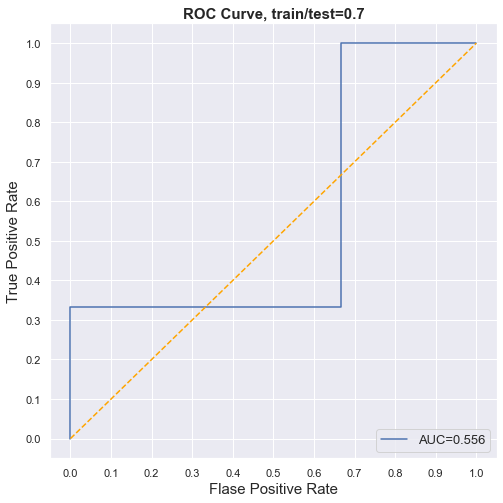

Done!


In [5]:
from mrp7pred.mrp7pred import MRP7Pred
from mrp7pred.grid import grid_light

m7p = MRP7Pred(train_new = True)
m7p.auto_train_test(
    df = df_train,
    grid = grid_light,
    model_dir = ".",
    feats_dir = ".",
    train_test_ratio = 0.7,
    featurized = False,
    random_state = 3,
    prefix = "demo",
    
)
clf = m7p.clf_best

In [6]:
clf

Pipeline(steps=[('fsel',
                 FeatureSelector(selected_feature_id=array([  0,   6,  10,  11,  15,  18,  19,  22,  23,  24,  29,  33,  35,
        36,  37,  39,  41,  42,  43,  44,  45,  46,  49,  50,  51,  52,
        53,  54,  56,  58,  59,  61,  63,  64,  66,  67,  69,  70,  71,
        72,  73,  74,  75,  77,  78,  79,  80,  81,  82,  83,  84,  87,
        90,  92,  93,  94,  95,  98,  99, 100, 102, 103, 105, 106, 127,
       128, 129, 156, 162, 173, 174, 175, 176, 184, 192, 193, 194, 197,
       204, 205, 213, 218, 246, 249, 274, 291,...
       690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702,
       703, 707, 711, 712, 718, 723, 724, 725, 727, 728, 730, 731, 732,
       733, 734, 735, 736, 739, 740, 743, 744, 745, 746, 747, 752, 756,
       758, 759, 760, 761, 763, 764, 765, 766, 767, 768, 769, 770, 771,
       772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 785, 786, 789,
       791, 793, 794, 826]))),
                ('sclr', StandardScaler()),
     